In [1]:
import pandas as pd
import numpy as np
import os
import time
from matplotlib import pyplot as plt
import DNA_tools as dt
import importlib

In [358]:
importlib.reload(dt)


<module 'DNA_tools' from '/Users/paucac/Documents/PhD/CAB/CRISPA/DNA_Tools/DNA_tools.py'>

In [2]:
reactions=pd.read_csv('USER_BTX.csv', sep=';')
bank = pd.read_csv('BTX_User108_180.csv', sep=';')
bank=bank.iloc[0:9,1:13]

Positions={ 'tips':'5', 'reageants':'6', 'bank':'9', 'target':'10' }
Component_Names ={'tips':'Sartorius Tips (0.5-200uL)',
                  'reageants':'24-Well plate',
                  'bank':'96-Well plate',
                  'target':'96-Well plate' }
Alphabet ={1:'A',2:'B',3:'C',4:'D',5:'E',6:'F',7:'G',8:'H'}

In [3]:
#will create a reagent plate
reagents=np.zeros([4,6]).astype(object)
#specifies destination plate (the fruit of your hard work)
fruit=np.zeros((8*12)).astype(object)
fruit[0:len(reactions)]=reactions.Tube_label.values

fruit =fruit.reshape(12,8).T


In [6]:
Positions['bank']

'9'

In [4]:
Source = []
Target = []
Volume = []
Polymerase = 0
MQ = 0
Tips = 0
Reuse_Tips =[]
sameTips = []


'''#Pipette Water and Polymerase mixed together:
#we assume Polymerase and MQ are mixed together in 24well plate with 2mL filled wells
for gene in reactions.Tube_label:
    # starts from r1c1 and jumps to r1c2...n when crossing 2000uL
    sR = 1
    sC = int((Polymerase+MQ)/2000) +1

    source = Positions['reageants']  + ':' + Alphabet[sR] + str(sC)
    volume = str(25+20) #uL
    
    #target
    tR = np.where(fruit==gene)[0][0] +1
    tC = np.where(fruit==gene)[1][0] +1
    target = Positions['target'] + ':' + Alphabet[tR] + str(tC)
    
    Target.append(target)
    Volume.append(volume)
    Source.append(source)
    Polymerase += 25
    MQ += 20
    Reuse_Tips.append('True')
    sameTips.append('True')

        #record how to prepare the reagents plate
    reagents[sR-1,sC-1] = 'Pol:'+str(Polymerase)+ ',MQ:'+str(MQ)
'''
#Pipette the primers:
for gene in reactions.Tube_label:

    #target
    tR = np.where(fruit==gene)[0][0] +1
    tC = np.where(fruit==gene)[1][0] +1
    
    #source
    igene=reactions['Tube_label']==gene
    for primer in ['Fw', 'Rv']:
        primer = reactions[igene][primer].values[0]

        sR = np.where(bank == primer)[0][0] +1
        sC = np.where(bank == primer)[1][0] +1
        source = Positions['bank'] + ':' + Alphabet[sR] + str(sC)
        target = Positions['target'] + ':' + Alphabet[tR] + str(tC)
        Source.append(source)
        Target.append(target)
        Volume.append('12.5')
        Reuse_Tips.append('False')
        sameTips.append('False')
        Tips +=1
print('vol Polymerase: ', Polymerase, 'ul, vol MQ: ', MQ ,'ul')

vol Polymerase:  0 ul, vol MQ:  0 ul


In [439]:
#write Moves DF
Moves =pd.DataFrame(data=np.vstack([Source, Target, Volume, Reuse_Tips]).T,
                    columns=['source', 'target', 'volume','reuseTips'])

#adds default/options
Moves['type'] = 'pipetting'
Moves['pipette'] = '1-Channel 200uL (Sartorius)'
Moves['tipType'] = 'Sartorius Tips (0.5-200uL)'


Moves['bottomTouch'] = 'TRUE'
Moves['liquidLevelDetection'] = 'TRUE'
Moves['bottomTouch'] = 'TRUE'

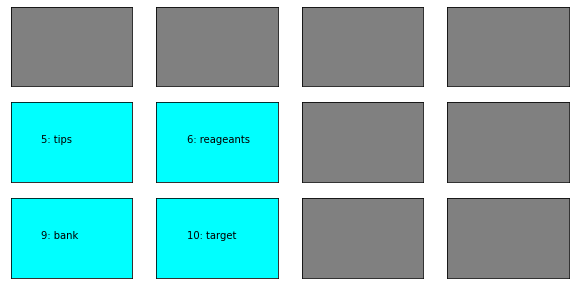

In [440]:

#draw the setup 
fig, axs = plt.subplots(3,4, figsize=(10,5))
axs = axs.flatten()

#get rid of the axes
[A.xaxis.set_visible(False) for A in axs]
[A.yaxis.set_visible(False) for A in axs]
#color area
[A.set_facecolor((0.5,0.5,0.5 )) for A in axs]


for what, where in Positions.items():
    where = int(where)
    axs[where-1].annotate(str(where) + ': ' +what , (0.25,0.5),rotation=0)
    axs[where-1].set_facecolor("cyan") 
plt.show()



In [441]:
#save make the csv file of the setup
Positions_df = pd.DataFrame()
Positions_df['pos'] = [p for p in Positions.values()]
Positions_df['component'] = [Component_Names[C] for C in Positions.keys()]


In [442]:


time_stamp = time.strftime("%Y-%m-%d %H:%M")
Moves.to_csv('Moves'+ time_stamp+'.csv', sep=',', index=0) #
Positions_df.to_csv('setup'+ time_stamp+'.csv', sep=',', index=0) #

In [444]:
#format bank into printable table
pd.DataFrame(np.hstack([np.array([l for l in Alphabet.values()]).reshape(-1,1),bank]))

,0,1,2,3,4,5,6,7,8,9,10
0,A,BTX.108,BTX.116,BTX.124,BTX.132,BTX.140,BTX.165,BTX.173,NaN,NaN,NaN
1,B,BTX.109,BTX.117,BTX.125,BTX.133,BTX.141,BTX.166,BTX.174,NaN,NaN,NaN
2,C,BTX.110,BTX.118,BTX.126,BTX.134,BTX.142,BTX.167,BTX.175,NaN,NaN,NaN
3,D,BTX.111,BTX.119,BTX.127,BTX.135,BTX.143,BTX.168,BTX.176,NaN,NaN,NaN
4,E,BTX.112,BTX.120,BTX.128,BTX.136,BTX.161,BTX.169,BTX.177,NaN,NaN,NaN
5,F,BTX.113,BTX.121,BTX.129,BTX.137,BTX.162,BTX.170,BTX.178,NaN,NaN,NaN
6,G,BTX.114,BTX.122,BTX.130,BTX.138,BTX.163,BTX.171,BTX.179,NaN,NaN,NaN
7,H,BTX.115,BTX.123,BTX.131,BTX.139,BTX.164,BTX.172,BTX.180,NaN,NaN,NaN


In [445]:

#format fruit into printable table
pd.DataFrame(np.hstack([np.array([l for l in Alphabet.values()]).reshape(-1,1),fruit]))


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,A,CAX4.up,PDX3.up,PRY1.up,STV1.up,KGD2_CDS,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,B,CAX4.dw,PDX3.dw,PRY1.dw,STV1.dw,PDX3_CDS,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C,GLR1.up,PRO2.up,GET4.up,pTEF::KanMX::tTef_1,PRO2_CDS,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,D,GLR1.dw,PRO2.dw,GET4.dw,pTEF::KanMX::tTef_2,VMA16_CDS,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,E,HEM25.up,VMA16.up,CMG1.up,pTEF::KanMX::tTef_3,YSY6_CDS,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,F,HEM25.dw,VMA16.dw,CMG1.dw,CAX4_CDS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,G,KGD2.up,YSY6.up,YCR101C.up,GLR1_CDS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,H,KGD2.dw,YSY6.dw,YCR101C.dw,HEM25_CDS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


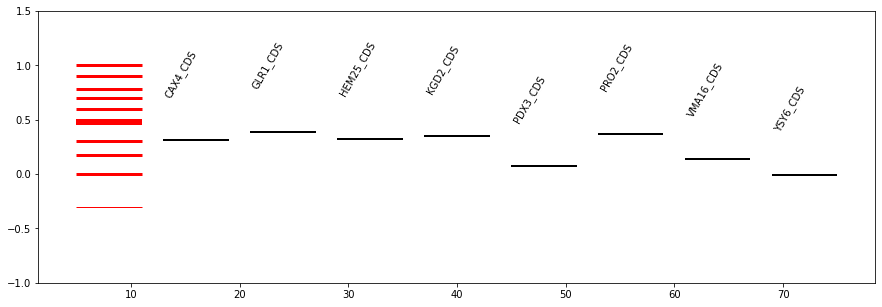

In [518]:

#Draws the expected gel:

ladder_1kb =        [10,8,6,5,4,3,2,1.5,1,0.5]
#parse sizes from reactions df
sizes=[float(S.replace('kb','')) for S in reactions['Size']  ]
sizes=sizes[-8:]
names = [N for N in reactions['Tube_label']]
names= names[-8:]

dt.run_gel(sizes, ladder_1kb, names )

In [514]:
for c in range(8):
    fw,rv=bank.iloc[6:8,c].values
    i = (reactions['Fw']== fw )& (reactions['Rv']==rv)
    tube=reactions[i]['Tube_label'].values
    size = reactions[i]['Size'].values[0]
    print(tube, fw, rv, size)

['KGD2.dw'] BTX.114 BTX.115 0.2kb
['VMA16.dw'] BTX.122 BTX.123 0.2kb
['PRO2.dw'] BTX.130 BTX.131 0.2kb
['PDX3.dw'] BTX.138 BTX.139 0.2kb
['PRY1.dw'] BTX.163 BTX.164 0.2kb
['CMG1.dw'] BTX.171 BTX.172 0.2kb
['STV1.dw'] BTX.179 BTX.180 0.2kb


IndexError: index 0 is out of bounds for axis 0 with size 0

In [511]:
reactions[i]

,Unnamed: 0,Template,Tube_label,tm,Size,Fw,Rv,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14


In [448]:
reactions


,Unnamed: 0,Template,Tube_label,tm,Size,Fw,Rv,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,1,ScBTX20 gDNA,CAX4.up,60C,0.2kb,BTX.124,BTX.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,ScBTX20 gDNA,CAX4.dw,60C,0.2kb,BTX.126,BTX.127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,ScBTX20 gDNA,GLR1.up,60C,0.2kb,BTX.132,BTX.133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,ScBTX20 gDNA,GLR1.dw,60C,0.2kb,BTX.134,BTX.135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,ScBTX20 gDNA,HEM25.up,60C,0.2kb,BTX.116,BTX.117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,ScBTX20 gDNA,HEM25.dw,60C,0.2kb,BTX.118,BTX.119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,ScBTX20 gDNA,KGD2.up,60C,0.22kb,BTX.112,BTX.113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,ScBTX20 gDNA,KGD2.dw,60C,0.2kb,BTX.114,BTX.115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,ScBTX20 gDNA,PDX3.up,60C,0.2kb,BTX.136,BTX.137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,ScBTX20 gDNA,PDX3.dw,60C,0.2kb,BTX.138,BTX.139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
